# Lab 2

Saransh Kacharia
<br>
October 18th

## Problem 1

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

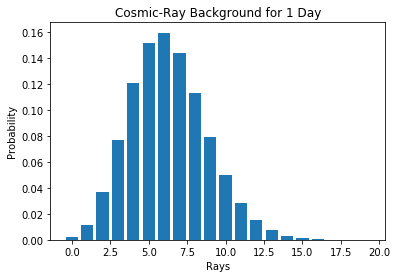

In [2]:
X = 6.3
rays = np.arange(0, 20)
p = stats.poisson.pmf(rays, X)
fig = plt.bar(rays, p)
plt.title("Cosmic-Ray Background for 1 Day")
plt.xlabel("Rays")
plt.ylabel("Probability")
plt.show()

The above graph is a distribution of the probability of the number of cosmic-rays for any given day. If this is integrated over more days then the result will get more gaussian although it will still technically be poisson becasue it is discrete, just smaller steps.

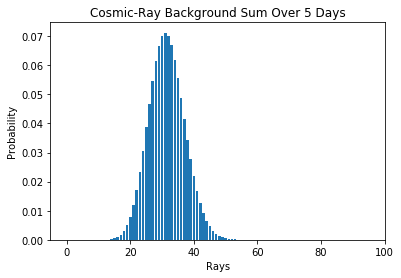

In [3]:
n = 5
sump = p
for i in range(n-1):
    sump = np.convolve(sump, p)
sumrays = np.arange(rays[0]*n, rays[-1]*n+1)
fig = plt.bar(sumrays, sump)
plt.title("Cosmic-Ray Background Sum Over 5 Days")
plt.xlabel("Rays")
plt.ylabel("Probability")
plt.show()

It is still poisson because if you add the same distribution to itself you end up with the same distribution. Summing it doesnt change its shape.

However, as the number of days approaches infinity the distribution approaches a perfect gaussian, while still being a poisson distribution all the way through because of the discrete steps.

An average over 5 days would look more gaussian than the original graph, more narrow and more symettric, it is the same as the 5 day sum graph with the x-axis is scaled differently.

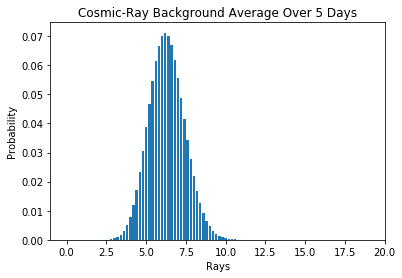

In [4]:
avgrays = np.divide(sumrays, n)
fig = plt.bar(avgrays, sump, width=0.15)
plt.title("Cosmic-Ray Background Average Over 5 Days")
plt.xlabel("Rays")
plt.ylabel("Probability")
plt.show()

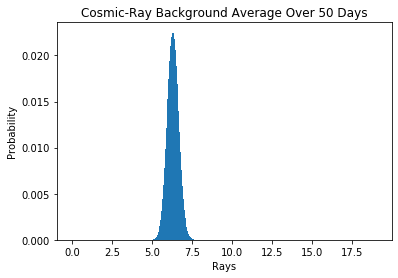

In [5]:
n = 50
sump = p
for i in range(n-1):
    sump = np.convolve(sump, p)
sumrays = np.arange(rays[0]*n, rays[-1]*n+1)
avgrays = np.divide(sumrays, n)
fig = plt.bar(avgrays, sump, width=0.05)
plt.title("Cosmic-Ray Background Average Over 50 Days")
plt.xlabel("Rays")
plt.ylabel("Probability")
plt.show()

This result showing the average over 50 days supports my earlier statement where I claimed that as the number of days approaches ininity the distribution gets more gaussian. This conforms with the central limith theorem because the central limit theorem states that if a sample size approaches ininity, in this case, the number of days, then the distribution approaches a perfect gaussian. However, it is still technically a poisson distribution because we are not sampleing over infinite days. It is just that a significantly large number of days can be approximated by a gaussian.

If we saw $Y\times N$ gamma rays from our source, with $Y = 12$, $N = 15$, we would see 180 gamma rays. The probability of seeing 180 gamma rays from the background is very low.

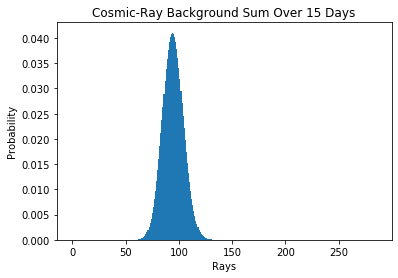

In [6]:
n = 15
sump = p
for i in range(n-1):
    sump = np.convolve(sump, p)
sumrays = np.arange(rays[0]*n, rays[-1]*n+1)
fig = plt.bar(sumrays, sump, width=1)
plt.title("Cosmic-Ray Background Sum Over 15 Days")
plt.xlabel("Rays")
plt.ylabel("Probability")
plt.show()

In [7]:
i = list(sumrays).index(180)
pval = 1 - sum(sump[:i+1])
print(f"Probability that the background produced a signal of 180 gamma rays or more: {pval*100:.4f}%")
sigma = stats.norm.ppf(1-pval)
print(f"Sigma: {sigma:.3f}")

Probability that the background produced a signal of 180 gamma rays or more: 0.0156%
Sigma: 3.606


## Problem 2

Total Probability (should be 1): 0.99899


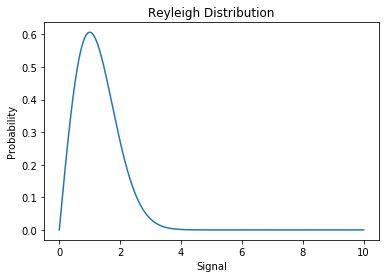

In [8]:
x = np.linspace(0, 10, 1000)
p = stats.rayleigh.pdf(x)
fig = plt.plot(x, p, label='rayleigh pdf')
print(f'Total Probability (should be 1): {sum(p)*(10/len(p)):.5f}')
plt.title("Reyleigh Distribution")
plt.xlabel("Signal")
plt.ylabel("Probability")
plt.show()

Here we have a Reyleigh Distribtion and as we average over intervals of this distribution we will see how it approaches a gaussian.

Total Probability (should be 1): 1.00000


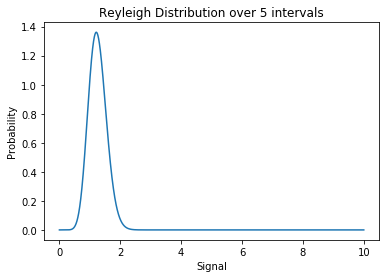

In [9]:
n = 5
sump = p
for i in range(n-1):
    sump = np.convolve(sump, p)
x = np.linspace(0, 10, sump.size)
total = sum(sump)
avgp = np.divide(sump, total)
fig = plt.plot(x, avgp*sump.size/10)
print(f'Total Probability (should be 1): {sum(avgp):.5f}')
plt.title("Reyleigh Distribution over 5 intervals")
plt.xlabel("Signal")
plt.ylabel("Probability")
plt.show()

This looks more gaussian than the original.

Total Probability (should be 1): 1.00000


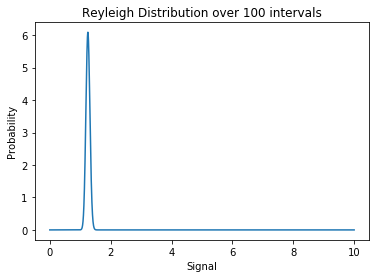

In [10]:
n = 100
sump = p
for i in range(n-1):
    sump = np.convolve(sump, p)
x = np.linspace(0, 10, sump.size)
total = sum(sump)
avgp = np.divide(sump, total)
fig = plt.plot(x, avgp*sump.size/10)
print(f'Total Probability (should be 1): {sum(avgp):.5f}')
plt.title("Reyleigh Distribution over 100 intervals")
plt.xlabel("Signal")
plt.ylabel("Probability")
plt.show()

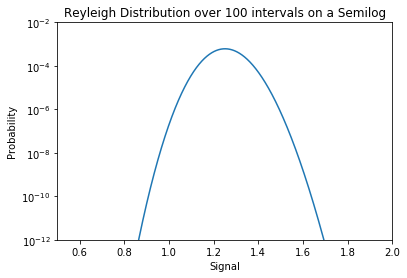

In [11]:
fig = plt.plot(x,avgp)
plt.yscale('log')
plt.xlim(0.5,2)
plt.ylim(10**-12, 10**-2)
plt.title("Reyleigh Distribution over 100 intervals on a Semilog")
plt.xlabel("Signal")
plt.ylabel("Probability")
plt.show()


Here we see the upside down parabola showing us that as we average over a large number of intervals the Reyleigh Distribution approaches a gaussian distribution. It approaches a gaussian at around 10 intervals but it can best be seen when using even larger intervals. There is no clear answer as to when it starts approaching a gaussian distribution because each interval makes it more and more gaussian.

## Problem 3

__Version 1__: You have an alert from LIGO that is also seen in with the X-ray/ultra-violet satellite SWIFT. SWIFT gives you a very precise location, so you take an image of that part of the sky. But because of SWIFT's accuracy, you know which pixel in your image to look for a counterpart in. 

$X = 1.4$, this is the background Gaussian Distribution width, $Y = 7.5$, this is the signal strength.

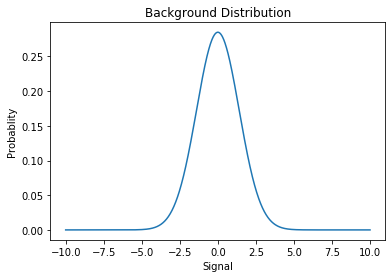

Sigma: 5.35714


In [12]:
x=np.linspace(-10,10,1000)
dist = stats.norm.pdf(x, 0, 1.4)

p = 1 - stats.norm.cdf(7.5, scale = 1.4)
sigma = stats.norm.ppf(1 - p)

plt.title("Background Distribution")
plt.xlabel("Signal")
plt.ylabel("Probablity")
plt.plot(x, dist)
plt.show()

print(f"Sigma: {sigma:.5f}")

We can claim discovery with certainty of 5.36 sigma.

__Version 2__: You have an alert from LIGO, but no associated detection from SWIFT. This could be because it is a black hole-black hole merger, a black hole-neutron star merger (neither seem to emit X-rays or UV light), or it could because SWIFT was indisposed at the time (wrong side of the earth in its orbit). Whatever the cause, you know what region of the sky to look in, but not which pixel. If you have to look for a signal in 10k pixels, what is the probability distribution of your background?

"What is the probability of getting a measurement of $Y=7.5$ in 10k pixels?"

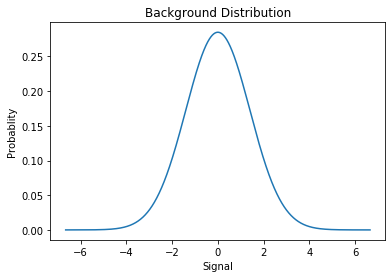

In [13]:
x = np.linspace(stats.norm.ppf(0.000001, loc=0, scale=1.4), stats.norm.ppf(0.999999, loc=0, scale=1.4), 10000)
pixels = stats.norm.pdf(x, loc=0, scale=1.4)
fig = plt.plot(x, pixels)
plt.title("Background Distribution")
plt.xlabel("Signal")
plt.ylabel("Probablity")
plt.show()

In [14]:
prob = (1 - stats.norm.cdf(7.5, loc=0, scale=1.4))*10000
sig = stats.norm.ppf(1-prob)
print(f"Sigma: {sig:.3f}")

Sigma: 3.337


We cannot claim discovery because we dont have a significance of more than 5 sigma.

## Problem 4

In [15]:
sigma = 1 - stats.norm.cdf(5)
signal = stats.norm.ppf(1 - sigma, scale=1.4)
print(f"Signal strength for 5 sigma in version 1: {signal:.0f}")

Signal strength for 5 sigma in version 1: 7


In [16]:
sigma = 1 - stats.norm.cdf(5)
signal = stats.norm.ppf(1 - sigma / 10000, scale=1.4)
print(f"Signal strength for 5 sigma in version 2: {signal:.3f}")
factor = signal / 7
print(f"Brightness factor compared to 7: {factor:.3f}")

Signal strength for 5 sigma in version 2: 9.171
Brightness factor compared to 7: 1.310


The brightness of the signal must be 1.3 times as bright if you have a trials factor of 10K. The sensityivity penalty is so low due to the tail of the distribution being a very small portion of the data so increasing the trials factor doesnt increase the background signal in the tails as much.

In [17]:
sigma = 1 - stats.norm.cdf(5)
signal = stats.norm.ppf(1 - sigma / 10000000, scale=1.4)
print(f"Signal strength required for 5σ : {signal:.3f}")
factor = signal/  7
print(f"Brightness factor compared to 7 : {factor:.3f}")

Signal strength required for 5σ : 10.520
Brightness factor compared to 7 : 1.503


If we change the trials factor to 10 million then the signal needs to be 1.5 times as bright. Here we see that increasing the trials factor has a minimal (small factor relative to the trials factor) change on the required brightness for a discovery to be made.

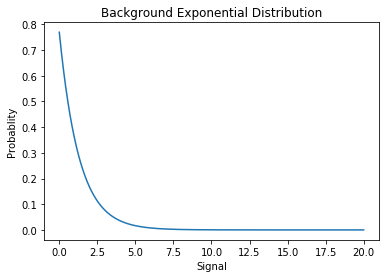

In [18]:
x = np.linspace(0,20,1000)
pdf = stats.expon.pdf(x, loc=0, scale=1.3)
fig = plt.plot(x, pdf)
plt.title("Background Exponential Distribution")
plt.xlabel("Signal")
plt.ylabel("Probablity")
plt.show()

In [19]:
sigma = 1 - stats.norm.cdf(5)
signal1 = stats.expon.ppf(1 - sigma, scale=1.4)
print(f"Signal strength for 5 sigma: {signal1:.3f}")

signal = stats.expon.ppf(1 - sigma / 10000, scale=1.4)
print(f"Signal strength for 5 sigma at 10k trials: {signal:.3f}")
factor = signal / signal1
print(f"Signal factor : {factor:.3f}\n")

Signal strength for 5 sigma: 21.091
Signal strength for 5 sigma at 10k trials: 33.985
Signal factor : 1.611



The sensitivity penalty is greater for an expoenential distribution because the tail falls off at a slower rate. This makes sense because a gaussian is $e^{-x^2}$ which falls off faster than a normal expoenential because the $-x^2$ term in the gaussian grows faster than the exponenet of a normal expoenential.